<a href="https://colab.research.google.com/github/Sbbarse787/Spam-Classification/blob/master/NLP_SPAM_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
cd/gdrive/My Drive/Colab Notebooks/SAS/NLP_SPAM_CLASSIFICATION

/gdrive/My Drive/Colab Notebooks/SAS/NLP_SPAM_CLASSIFICATION


In [ ]:
ls

combin_train_test.csv  readme         training_data.csv
MyPredictions.csv      test_data.csv


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [ ]:
df=pd.read_csv('training_data.csv')
df.rename(columns={'msg_text':'SMS'},inplace=True)
df.head(10)

,SMS,ham_or_spam
0,"Haha better late than ever, any way I could sw...",ham
1,Thanks a lot for your wishes on my birthday. T...,ham
2,A guy who gets used but is too dumb to realize...,ham
3,Talk sexy!! Make new friends or fall in love i...,spam
4,Nowadays people are notixiquating the laxinorf...,ham
5,PRIVATE! Your 2004 Account Statement for 07742...,spam
6,Gimme a few was &lt;#&gt; minutes ago,ham
7,K sure am in my relatives home. Sms me de. Pls:-),ham
8,Lol wtf random. Btw is that your lunch break,ham
9,V skint too but fancied few bevies.waz gona go...,ham


In [ ]:
df1 = pd.read_csv('test_data.csv')
df1.head(10)

,msg_text,ham_or_spam
0,Squeeeeeze!! This is christmas hug.. If u lik ...,NaN
1,And also I've sorta blown him off a couple tim...,NaN
2,Mmm thats better now i got a roast down me! i...,NaN
3,Mm have some kanji dont eat anything heavy ok,NaN
4,So there's a ring that comes with the guys cos...,NaN
5,Sary just need Tim in the bollox &it hurt him ...,NaN
6,"Love isn't a decision, it's a feeling. If we c...",NaN
7,My supervisor find 4 me one lor i thk his stud...,NaN
8,Dear good morning now only i am up,NaN
9,I'm in chennai velachery:),NaN


In [ ]:
df.columns

Index(['SMS', 'ham_or_spam'], dtype='object')

In [ ]:
df.shape

(5014, 2)

In [ ]:
df['SMS'].unique()

array(['Haha better late than ever, any way I could swing by?',
       'Thanks a lot for your wishes on my birthday. Thanks you for making my birthday truly memorable.',
       'A guy who gets used but is too dumb to realize it.', ...,
       'Hi, wlcome back, did wonder if you got eaten by a lion or something, nothing much',
       'Nt joking seriously i told',
       'Did he just say somebody is named tampa'], dtype=object)

In [ ]:
df.isnull().sum()

SMS            0
ham_or_spam    0
dtype: int64

In [ ]:
df['ham_or_spam'].replace({'ham':0,'spam':1},inplace=True)

In [ ]:
df.head()

,SMS,ham_or_spam
0,"Haha better late than ever, any way I could sw...",0
1,Thanks a lot for your wishes on my birthday. T...,0
2,A guy who gets used but is too dumb to realize...,0
3,Talk sexy!! Make new friends or fall in love i...,1
4,Nowadays people are notixiquating the laxinorf...,0


In [ ]:
df.dtypes

SMS            object
ham_or_spam     int64
dtype: object

In [ ]:
df1.drop_duplicates(inplace=True)
df1.shape

(551, 2)

In [ ]:
df.drop_duplicates(inplace=True)   

In [ ]:
df.shape

(4675, 2)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def process_text(text):
  nopunc  = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  cln_word = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return cln_word

In [ ]:
df['SMS'].shape

(4675,)

In [ ]:
df['ham_or_spam'].dtypes

dtype('int64')

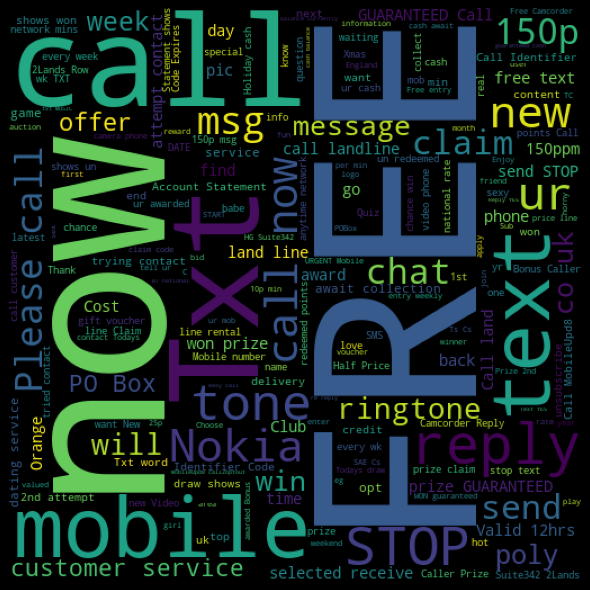

In [ ]:

spam_words = ''.join(list(df[df['ham_or_spam']==1]['SMS']))
spam_wc = WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize = (10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

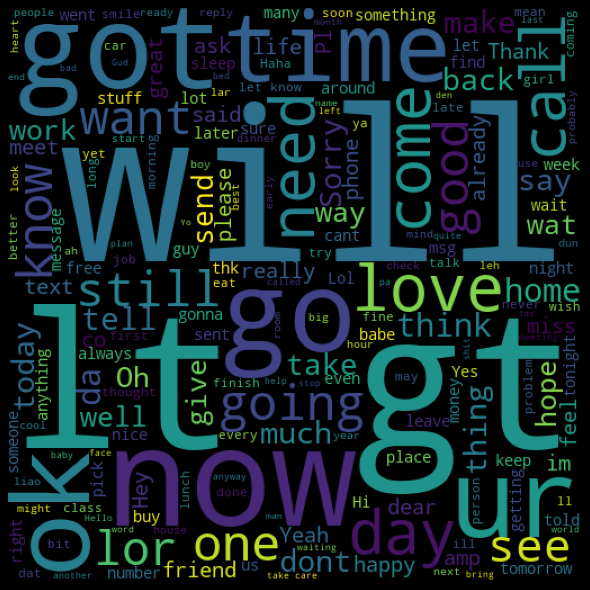

In [ ]:
from wordcloud import WordCloud
spam_words = ''.join(list(df[df['ham_or_spam']==0]['SMS']))
spam_wc = WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize = (10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df['SMS'].apply(process_text)
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process_text).fit_transform(df['SMS'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message,df['ham_or_spam'],test_size=0.11,random_state=10)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train,y_train)


In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test,pred))
print()
print('confusion matrix:\n',confusion_matrix(y_test,pred))
print()
print('Accuracy:',accuracy_score(y_test,pred))
NB_Acc = accuracy_score(y_test,pred)
#print(NB_Acc)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       434
           1       0.81      0.98      0.88        81

    accuracy                           0.96       515
   macro avg       0.90      0.97      0.93       515
weighted avg       0.97      0.96      0.96       515


confusion matrix:
 [[415  19]
 [  2  79]]

Accuracy: 0.9592233009708738


**Applying Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pred = classifier_DT.predict(X_test)
print(classification_report(y_test,pred))
print()
print('confusion matrix:\n',confusion_matrix(y_test,pred))
print()
print('Accuracy:',accuracy_score(y_test,pred))
DT_Acc = accuracy_score(y_test,pred)
#print(DT_Acc)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       434
           1       0.98      0.80      0.88        81

    accuracy                           0.97       515
   macro avg       0.97      0.90      0.93       515
weighted avg       0.97      0.97      0.97       515


confusion matrix:
 [[433   1]
 [ 16  65]]

Accuracy: 0.9669902912621359


**Applying Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
pred = classifier_RF.predict(X_test)
print(classification_report(y_test,pred))
print()
print('confusion matrix:\n',confusion_matrix(y_test,pred))
print()
print('Accuracy:',accuracy_score(y_test,pred))
RF_Acc = accuracy_score(y_test,pred)
#print(RF_Acc) 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       434
           1       1.00      0.78      0.88        81

    accuracy                           0.97       515
   macro avg       0.98      0.89      0.93       515
weighted avg       0.97      0.97      0.96       515


confusion matrix:
 [[434   0]
 [ 18  63]]

Accuracy: 0.9650485436893204
